In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#drop missing values
df=df.dropna()

In [8]:
# check again for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

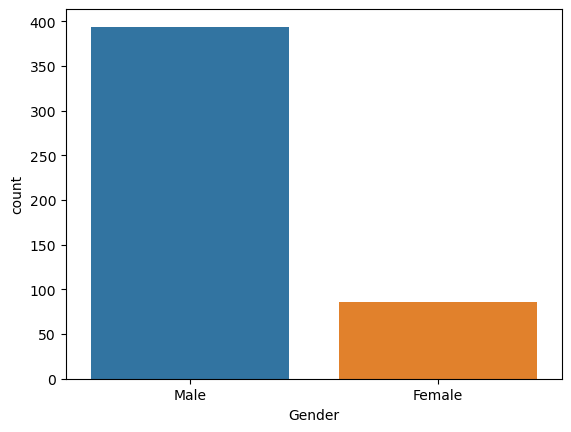

In [9]:
sns.countplot(data=df,x="Gender")
plt.show()

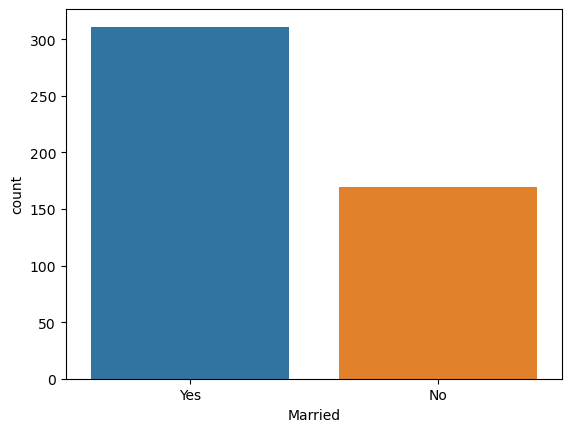

In [10]:
sns.countplot(data=df,x="Married")
plt.show()

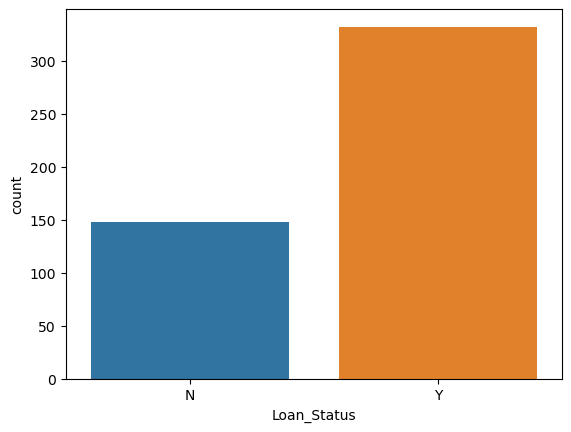

In [11]:
sns.countplot(data=df,x="Loan_Status")
plt.show()

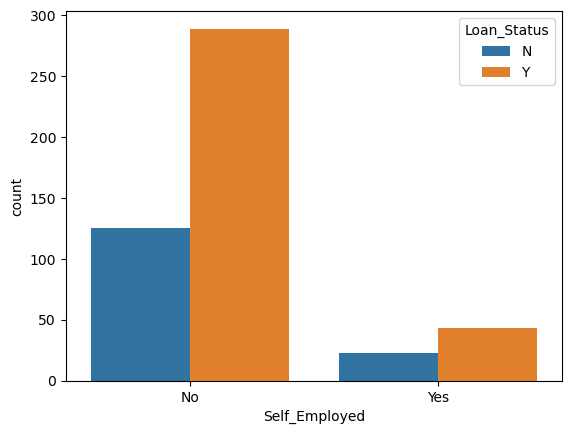

In [12]:
sns.countplot(data=df,x="Self_Employed",hue="Loan_Status")
plt.show()

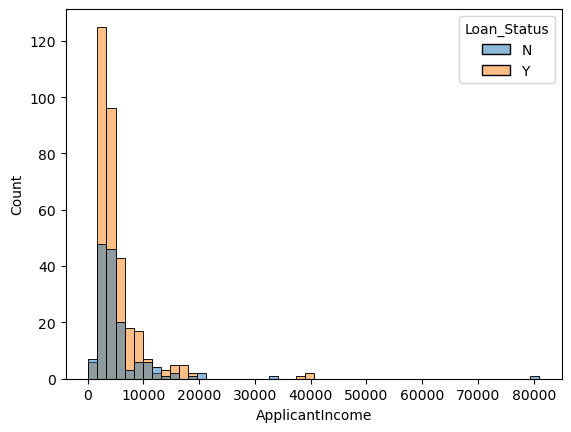

In [13]:
sns.histplot(data=df, x="ApplicantIncome",hue="Loan_Status",bins=50)
plt.show()

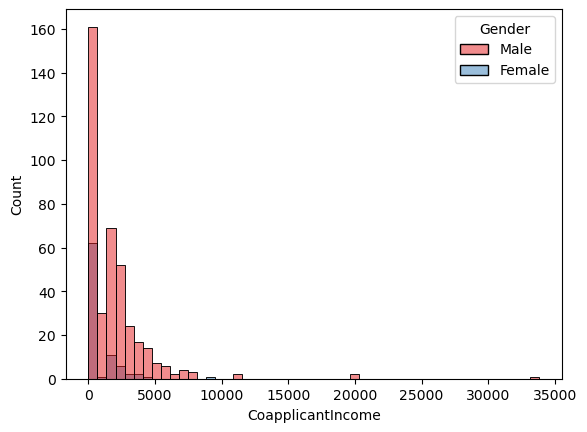

In [14]:
sns.histplot(data=df, x="CoapplicantIncome",hue="Gender",bins=50,palette="Set1")
plt.show()

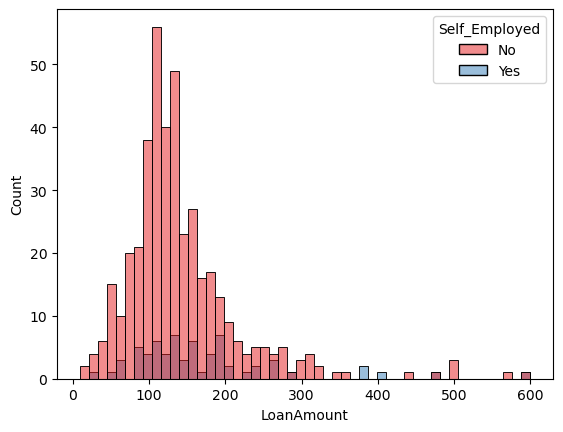

In [15]:
sns.histplot(data=df, x="LoanAmount",hue="Self_Employed",bins=50,palette="Set1")
plt.show()

In [16]:
label=["NO","Yes"]

In [17]:
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [18]:
df["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [19]:
df=df.replace(to_replace="3+",value=4)

In [20]:
df["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [21]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [22]:
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})
df["Property_Area"]=df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

In [23]:
df.drop(columns="Loan_ID",axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["Loan_Status"])
Y=df["Loan_Status"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
# Create a linear SVM classifier
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
pred=svm_classifier.predict(X_test)
acc=accuracy_score(y_test,pred)
print(f"Accuracy Score is : {acc}")

Accuracy Score is : 0.8125


In [28]:
#classification_report
print(classification_report(y_test,pred,target_names=label))

              precision    recall  f1-score   support

          NO       1.00      0.36      0.53        28
         Yes       0.79      1.00      0.88        68

    accuracy                           0.81        96
   macro avg       0.90      0.68      0.70        96
weighted avg       0.85      0.81      0.78        96



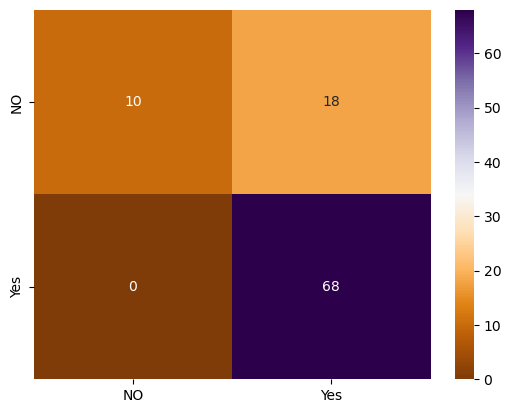

In [29]:
#confusion_matrix
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True,xticklabels=label,yticklabels=label,cmap="PuOr")
plt.show()

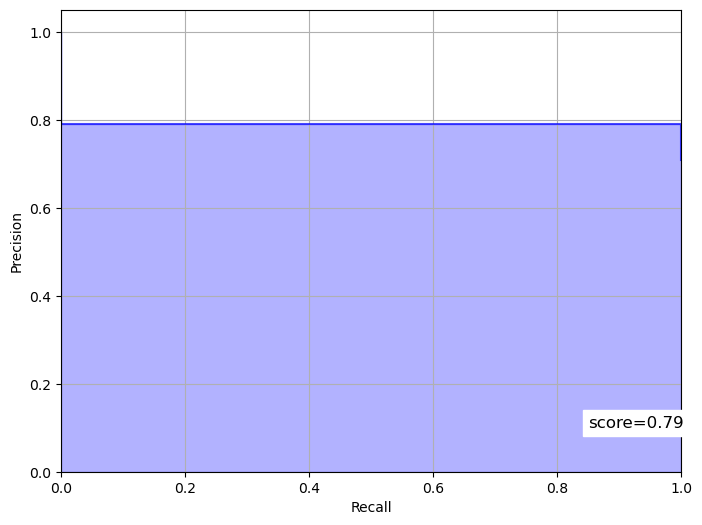

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, pred)

# Calculate the average precision score
average_precision = average_precision_score(y_test, pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='b', alpha=0.7)
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# Add the average precision score as text inside the plot
plt.text(0.85, 0.1, f'score={average_precision:.2f}', fontsize=12, color='black', backgroundcolor='white')

plt.grid(True)
plt.show()

Custom data prediction

In [32]:
x=np.array([1,1,1,1,0,4583,1508.0,128,360,1.0,0])
x=x.reshape(1,-1)
result=svm_classifier.predict(x)
if result==0:
  print("NO")
else:
  print("Yes")

Yes
